In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv

In [71]:
# Clean dataset, take only necessary columns, create new dataframes and save as csv

# File to Load
fastfood_to_load = "datasets/fast-food-restaurants/Datafiniti_Fast_Food_Restaurants.csv"
census_to_load = "datasets/us-census-demographic-data/acs2017_census_tract_data.csv"

# Read the CSV files
fastfood = pd.read_csv(fastfood_to_load)
census = pd.read_csv(census_to_load)

# Create FastFood dataset
ff_id = fastfood['id']
ff_name = fastfood['name']
ff_state = fastfood['province']
dict1 = {'state': ff_state, 'name': ff_name}  
fastfood_df = pd.DataFrame(dict1) 

# Output File (CSV)
output_ff_file = "output_data/fastfood.csv"

# Write DF to a CSV
fastfood_df.to_csv(output_ff_file, sep=';', encoding='utf-8')


# Create Census dataset
# Columns: State, Income, Professional, Unemployment
us_state = census['State']
us_income = census['Income']
us_professional = census['Professional']
us_unemployment = census['Unemployment']
dict2 = {'state': us_state, 'income': us_income, 'professional': us_professional, 'unemployment': us_unemployment}
census_df = pd.DataFrame(dict2)

# Output File (CSV)
output_us_file = "output_data/census.csv"

# Write output to the file
census_df.to_csv(output_us_file, sep=';', encoding='utf-8')

# Create population dataset
us_pop = census['TotalPop']
dict3 = {'state': us_state, 'population': us_pop}
population_df = pd.DataFrame(dict3)

# Output File (CSV)
output_us_file = "output_data/population.csv"

# Write output to the file
population_df.to_csv(output_us_file, sep=';', encoding='utf-8')


In [72]:
# This is required to change state names into abbreviations in order to merge datasets later
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [73]:
fastfood_df.head()

,state,name
0,LA,SONIC Drive In
1,LA,SONIC Drive In
2,TN,Taco Bell
3,TN,Arby's
4,GA,Steak 'n Shake


In [74]:
# Change state abbreviation to state name in census
census_df = census_df.replace({"state": us_state_abbrev})

In [75]:
census_df.head()

,state,income,professional,unemployment
0,AL,67826.0,38.5,4.6
1,AL,41287.0,30.5,3.4
2,AL,46806.0,27.9,4.7
3,AL,55895.0,29.0,6.1
4,AL,68143.0,48.8,2.3


In [77]:
# Change state abbreviation to state name in population
population_df = population_df.replace({"state": us_state_abbrev})

In [78]:
population_df.head()

,state,population
0,AL,1845
1,AL,2172
2,AL,3385
3,AL,4267
4,AL,9965


## Questions:
1. most popular FFR by state
2. correlation between white collar jobs and FFR
3. correlation between unemployment rate and FFR
4. correlation between income and FFR

In [79]:
# Clean NaNs from datasets
census_df = census_df.dropna()
fastfood_df = fastfood_df.dropna()
population_df = population_df.dropna()

In [80]:
#ffbs_df most popular fastfood in each state. 
ffbs_df = fastfood_df.groupby('state', as_index=False).agg({'name': lambda x: x.value_counts().index[0]})
ffbs_df.columns = ['state', 'most_popular_fastfood']
ffbs_df.head()

,state,most_popular_fastfood
0,AK,Subway
1,AL,Taco Bell
2,AR,McDonald's
3,AZ,McDonald's
4,CA,McDonald's


In [81]:
# number of FFRs in each state
ff_qty_df = fastfood_df.groupby('state', as_index=False).count()
ff_qty_df.columns = ['state', 'fastfood_qty']
ff_qty_df.head()

,state,fastfood_qty
0,AK,16
1,AL,6
2,AR,102
3,AZ,330
4,CA,1201


In [82]:
# Average income, number of prefessionals, and unemployed in each state
cen_mean_df = census_df.groupby('state', as_index=False).mean()
cen_mean_df.head()

,state,income,professional,unemployment
0,AK,73796.757576,35.360606,8.700606
1,AL,45938.212947,30.788501,8.644549
2,AR,44245.267936,30.750073,7.060322
3,AZ,57815.571807,34.612773,7.580278
4,CA,73070.965821,37.049925,7.856258


In [83]:
# Total population in each state
total_pop_df = population_df.groupby('state', as_index=False).sum()
total_pop_df.head()

,state,population
0,AK,738565
1,AL,4850771
2,AR,2977944
3,AZ,6809946
4,CA,38982847


In [85]:
# Merging datasets to create final DS ready for plotting.
cen_tot_df = pd.merge(total_pop_df, cen_mean_df, on='state', how='outer')
cen_mpf_df = pd.merge(cen_tot_df, ffbs_df, on='state', how='outer')
df = pd.merge(cen_mpf_df, ff_qty_df, on='state', how='outer')
df = df.dropna()
decimals = pd.Series([2, 2, 2, 2], index=['income', 'population', 'professional', 'unemployment'])
df = df.round(decimals)
df['fastfood_qty'] = df.fastfood_qty.astype(int)
df

,state,population,income,professional,unemployment,most_popular_fastfood,fastfood_qty
0,AK,738565,73796.76,35.36,8.70,Subway,16
1,AL,4850771,45938.21,30.79,8.64,Taco Bell,6
2,AR,2977944,44245.27,30.75,7.06,McDonald's,102
3,AZ,6809946,57815.57,34.61,7.58,McDonald's,330
4,CA,38982847,73070.97,37.05,7.86,McDonald's,1201
5,CO,5436519,69595.70,40.24,5.49,Taco Bell,148
6,CT,3594478,79622.42,41.24,7.81,Subway,53
7,DE,943732,64310.54,39.04,6.60,Arby's,44
9,FL,20278447,54263.60,34.21,7.43,McDonald's,621
10,GA,10201635,54650.18,34.38,8.19,McDonald's,420


<Figure size 2800x2800 with 0 Axes>

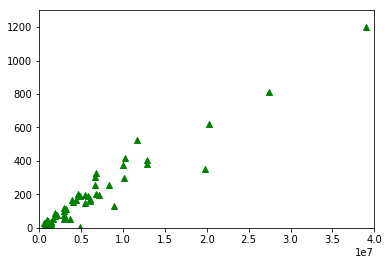

<Figure size 2800x2800 with 0 Axes>

In [131]:
plt.scatter(df['population'], df['fastfood_qty'], marker='^', color='green')
plt.axis([0, 40000000, 0, 1300])
plt.savefig('plots/ffr_population_read.png')

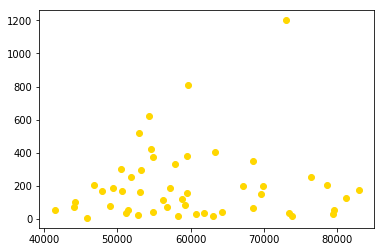

In [133]:
plt.scatter(df['income'], df['fastfood_qty'], marker='o', color='gold')
plt.savefig('plots/ffr_income_read.png')

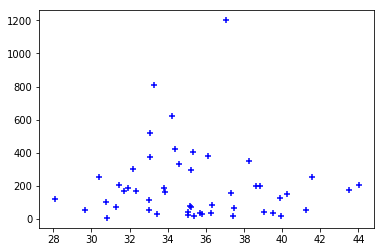

In [134]:
plt.scatter(df['professional'], df['fastfood_qty'], marker='+', color='blue')
plt.savefig('plots/ffr_professional_read.png')

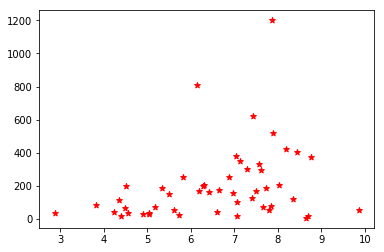

In [136]:
plt.scatter(df['unemployment'], df['fastfood_qty'], marker='*', color='red')
plt.savefig('plots/ffr_unemployment_read.png')

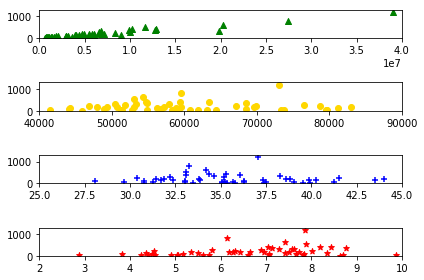

<Figure size 960x960 with 0 Axes>

In [132]:
# create masked array
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4)#, )
ax1.scatter(df['population'], df['fastfood_qty'], marker='^', color='green')
ax1.axis([0, 40000000, 0, 1300])

ax2.scatter(df['income'], df['fastfood_qty'], marker='o', color='gold')
ax2.axis([40000, 90000, 0, 1300])

ax3.scatter(df['professional'], df['fastfood_qty'], marker='+', color='blue')
ax3.axis([25, 45, 0, 1300])

ax4.scatter(df['unemployment'], df['fastfood_qty'], marker='*', color='red')
ax4.axis([2, 10, 0, 1300])

fig.tight_layout()
plt.figure(figsize=(20, 20), dpi=48)

plt.show()